In [1]:
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

In [63]:
X,y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_repeated=0, shuffle=False)

In [64]:
X = np.absolute(X)

In [65]:
X = np.round(X, 2) * 100
X = X.astype(int)

## Convert in to DataFrame

In [66]:
import pandas as pd

In [67]:
y = y.reshape(len(y), 1)

In [68]:
df = np.concatenate((X, y), axis=1)

In [69]:
column_name = ['Fitur 1', 'Fitur 2', 'Label']
df = pd.DataFrame(df, columns=column_name)

In [70]:
df.head()

,Fitur 1,Fitur 2,Label
0,71,136,0
1,82,111,0
2,166,7,0
3,92,117,0
4,216,38,0


In [71]:
df['Label'].unique()

array([0, 1])

In [72]:
labels = {
    1 : 'Kelas A',
    0 : 'Kelas B'
}

df_label = df.copy()
df_label['Label'] = df_label['Label'].map(labels)
df_label.head()

,Fitur 1,Fitur 2,Label
0,71,136,Kelas B
1,82,111,Kelas B
2,166,7,Kelas B
3,92,117,Kelas B
4,216,38,Kelas B


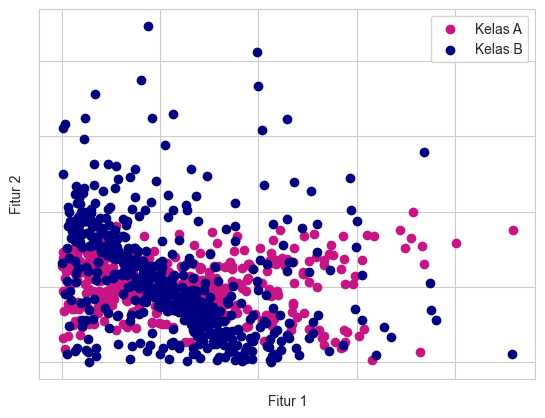

In [73]:
import matplotlib.pyplot as plt
colors = {
    'class_a': 'MediumVioletRed',
    'class_b': 'Navy'
}

gb = df_label.groupby(['Label'])
class_a = gb.get_group('Kelas A')
class_b = gb.get_group('Kelas B')
plt.scatter(x=class_a['Fitur 1'], y=class_a['Fitur 2'], c=colors['class_a'])
plt.scatter(x=class_b['Fitur 1'], y=class_b['Fitur 2'], c=colors['class_b'])
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.legend(['Kelas A', 'Kelas B'])
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

In [94]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [95]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [96]:
model = MultinomialNB()

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [98]:
model.fit(X_train, y_train)

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [99]:
y_train_pred = model.predict(X_train)
acc_train = accuracy_score(y_train, y_train_pred)

In [100]:
y_test_pred = model.predict(X_test)

In [101]:
acc_test = accuracy_score(y_test, y_test_pred)

In [102]:
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.4957142857142857
Hasil akurasi data test: 0.48
